In [1]:
import numpy as np
import pandas as pd

from modules import processor

In [2]:
pd.set_option('display.max_colwidth', None)
PATH = '/Users/kaledinaoa/data/data_sber_market_test_ml/'

raw_data = processor.load_csv("train", PATH)
sample_sumbission = processor.load_csv("sample_submission", PATH)

In [4]:
raw_data.sort_values(by='user_id')

,user_id,order_completed_at,cart
2965145,0,2020-08-24 08:55:32,411
2965147,0,2020-08-24 08:55:32,432
2965148,0,2020-08-24 08:55:32,84
2422913,0,2020-07-19 09:59:17,20
2422914,0,2020-07-19 09:59:17,82
...,...,...,...
3054312,19998,2020-08-30 12:15:55,29
3106843,19998,2020-09-02 15:03:23,84
3074760,19999,2020-08-31 20:08:24,326
3074014,19999,2020-08-31 18:54:24,326


In [5]:
raw_data.sort_values(by='order_completed_at')

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
15,2,2015-03-22 09:25:46,425
14,2,2015-03-22 09:25:46,57
13,2,2015-03-22 09:25:46,89
11,2,2015-03-22 09:25:46,84
...,...,...,...
3123036,12702,2020-09-03 23:45:45,54
3123034,12702,2020-09-03 23:45:45,382
3123062,12702,2020-09-03 23:45:45,24
3123047,12702,2020-09-03 23:45:45,376


In [7]:
df = raw_data.copy()

# Преобразование столбца в тип datetime
df['order_completed_at'] = pd.to_datetime(df['order_completed_at'])

# Разделение на столбцы даты и времени
df['date'] = df['order_completed_at'].dt.date
df['time'] = df['order_completed_at'].dt.time


In [23]:
# Создание нового столбца для времени суток
def get_time_of_day(hour):
    # утро
    if 6 <= hour < 12:
        return 0 
    # день
    elif 12 <= hour < 18:
        return 1
    # вечер
    elif 18 <= hour < 24:
        return 2
    # ночь
    else:
        return 3
    
df['time_of_day'] = df['order_completed_at'].dt.hour.apply(get_time_of_day)
df['hour'] = df['order_completed_at'].dt.hour
df['month'] = df['order_completed_at'].dt.month
df['year'] = df['order_completed_at'].dt.year
df['weekday'] = df['order_completed_at'].dt.weekday
df['is_weekend'] = df['order_completed_at'].apply(lambda x: x.weekday() >= 5)


In [27]:
df.sort_values(by='cart')

,user_id,order_completed_at,cart,date,time,time_of_day,hour,month,year,is_weekend,weekday
674436,4915,2020-01-09 06:27:45,0,2020-01-09,06:27:45,0,6,1,2020,False,3
1037198,521,2020-03-21 19:38:19,0,2020-03-21,19:38:19,2,19,3,2020,True,5
242572,4087,2019-10-09 15:09:24,0,2019-10-09,15:09:24,1,15,10,2019,False,2
2477102,13651,2020-07-22 17:02:17,0,2020-07-22,17:02:17,1,17,7,2020,False,2
1496329,2444,2020-05-13 07:33:15,0,2020-05-13,07:33:15,0,7,5,2020,False,2
...,...,...,...,...,...,...,...,...,...,...,...
1367275,13281,2020-05-01 10:07:39,880,2020-05-01,10:07:39,0,10,5,2020,False,4
523959,4816,2019-12-06 15:30:33,880,2019-12-06,15:30:33,1,15,12,2019,False,4
522751,3238,2019-12-06 11:27:08,880,2019-12-06,11:27:08,0,11,12,2019,False,4
1982148,16977,2020-06-19 06:38:04,880,2020-06-19,06:38:04,0,6,6,2020,False,4


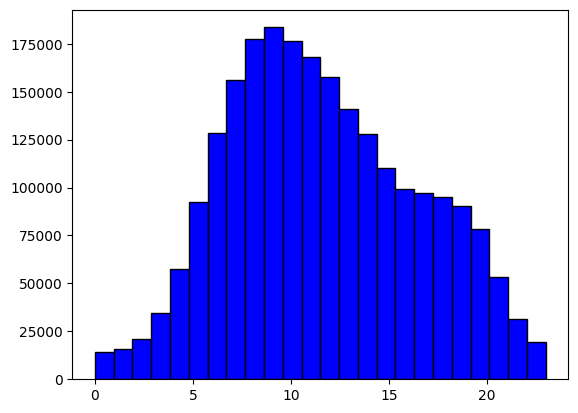

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


dff = df[df['is_weekend']==False]
# plot_cart = plt.hist(df['cart'],bins=880, color='blue', edgecolor='black')
plot_hour = plt.hist(dff['hour'],bins=24, color='blue', edgecolor='black')

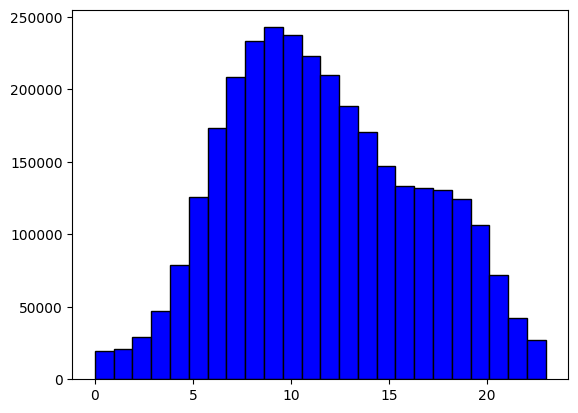

In [49]:

# plot_cart = plt.hist(df['cart'],bins=880, color='blue', edgecolor='black')
plot_hour = plt.hist(df['hour'],bins=24, color='blue', edgecolor='black')